In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [180]:
df = pd.read_csv('Company_data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [181]:
df.shape

(400, 11)

In [182]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 29.8+ KB


In [184]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


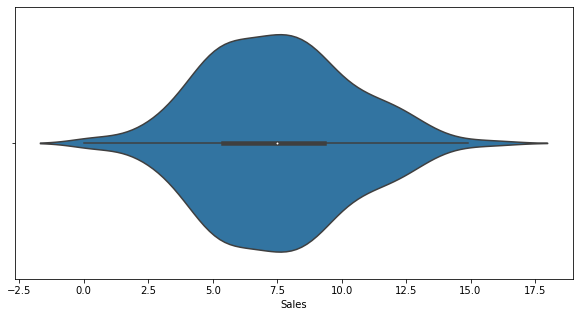

In [185]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales'])
plt.show()


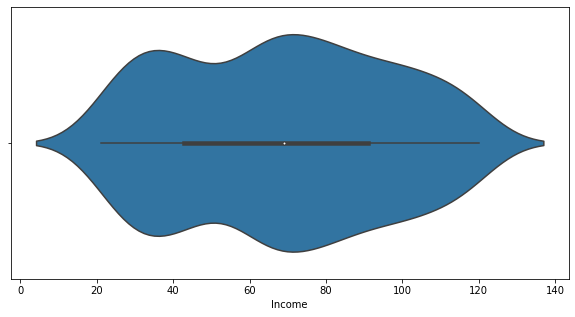

In [186]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Income'])
plt.show()


In [187]:
percentiles = df['Sales'].quantile([0.05,0.95]).values
df['Sales'][df['Sales'] <= percentiles[0]] = percentiles[0]
df['Sales'][df['Sales'] >= percentiles[1]] = percentiles[1]

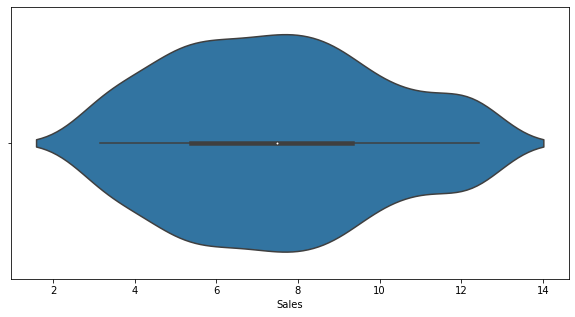

In [188]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Sales'])
plt.show()

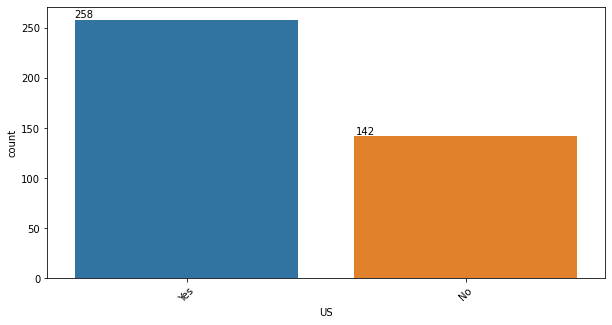

In [189]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['US'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

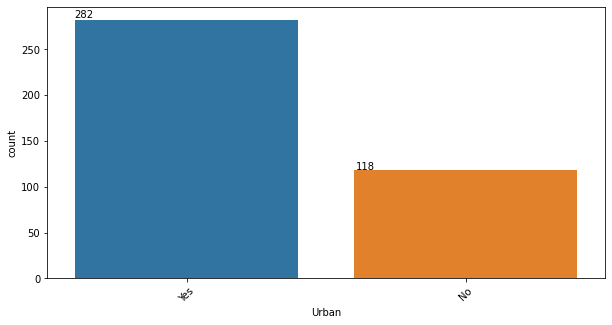

In [190]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['Urban'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

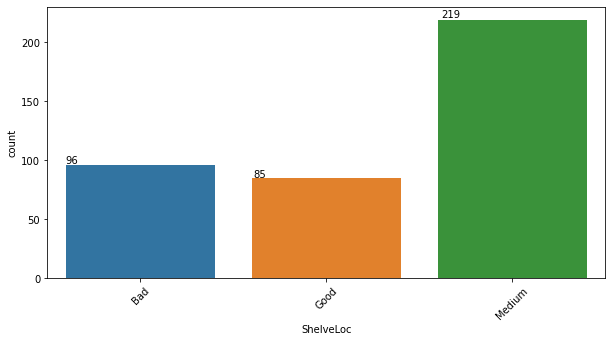

In [191]:
plt.figure(figsize = (10,5))
ax= sns.countplot(df['ShelveLoc'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

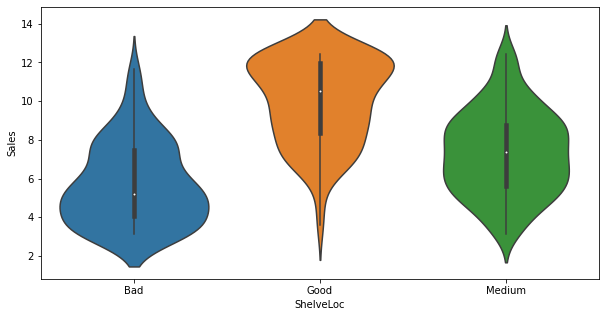

In [192]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Sales', x = 'ShelveLoc', data = df)
plt.show()

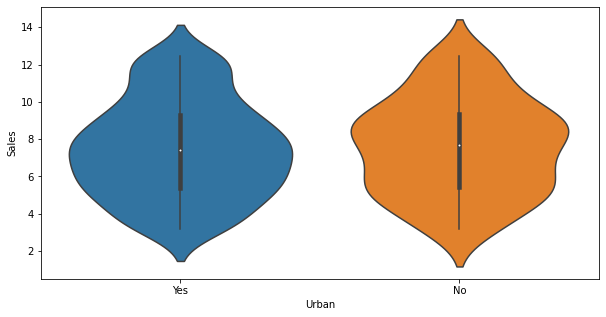

In [193]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Sales', x = 'Urban', data = df)
plt.show()

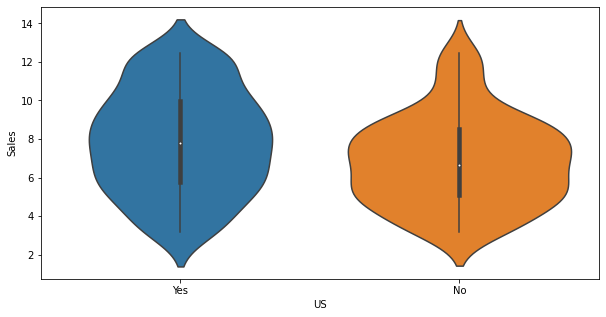

In [194]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Sales', x = 'US', data = df)
plt.show()

In [195]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
df['Sales'] = pd.cut(x=df['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

<AxesSubplot:xlabel='Sales', ylabel='count'>

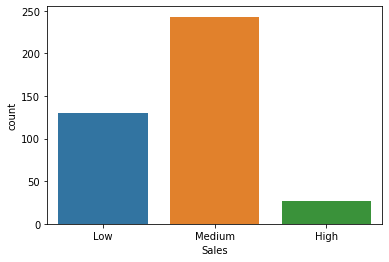

In [196]:
sns.countplot(df['Sales'])

In [197]:
df['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

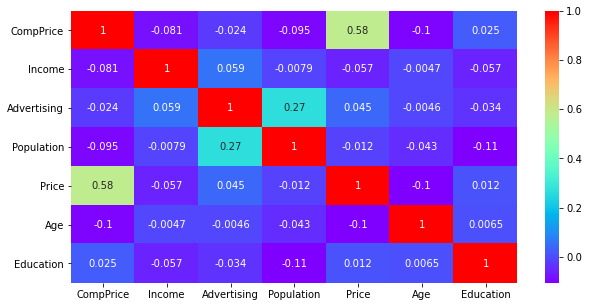

In [198]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [199]:
# Converting other attributes into categories
df['CompPrice'] = pd.cut(x=df['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

df['Income'] = pd.cut(x=df['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

df['Advertising'] = pd.cut(x=df['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

df['Population'] = pd.cut(x=df['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

df['Price'] = pd.cut(x=df['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

df['Age'] = pd.cut(x=df['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

df['Education'] = pd.cut(x=df['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [200]:
#encoding categorical data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Sales'] = label_encoder.fit_transform(df['Sales'])
df['CompPrice'] = label_encoder.fit_transform(df['CompPrice'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['Advertising'] = label_encoder.fit_transform(df['Advertising'])
df['Population'] = label_encoder.fit_transform(df['Population'])
df['Price'] = label_encoder.fit_transform(df['Price'])
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [201]:
X = df.drop('Sales', axis = 1)
y = df['Sales']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)
X_train.shape, X_test.shape

((240, 10), (160, 10))

In [203]:
dt= DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [204]:
from sklearn import tree

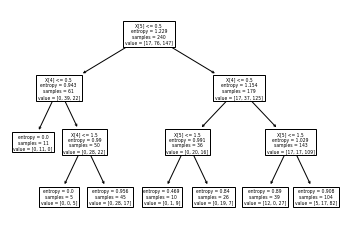

In [205]:
tree.plot_tree(dt);

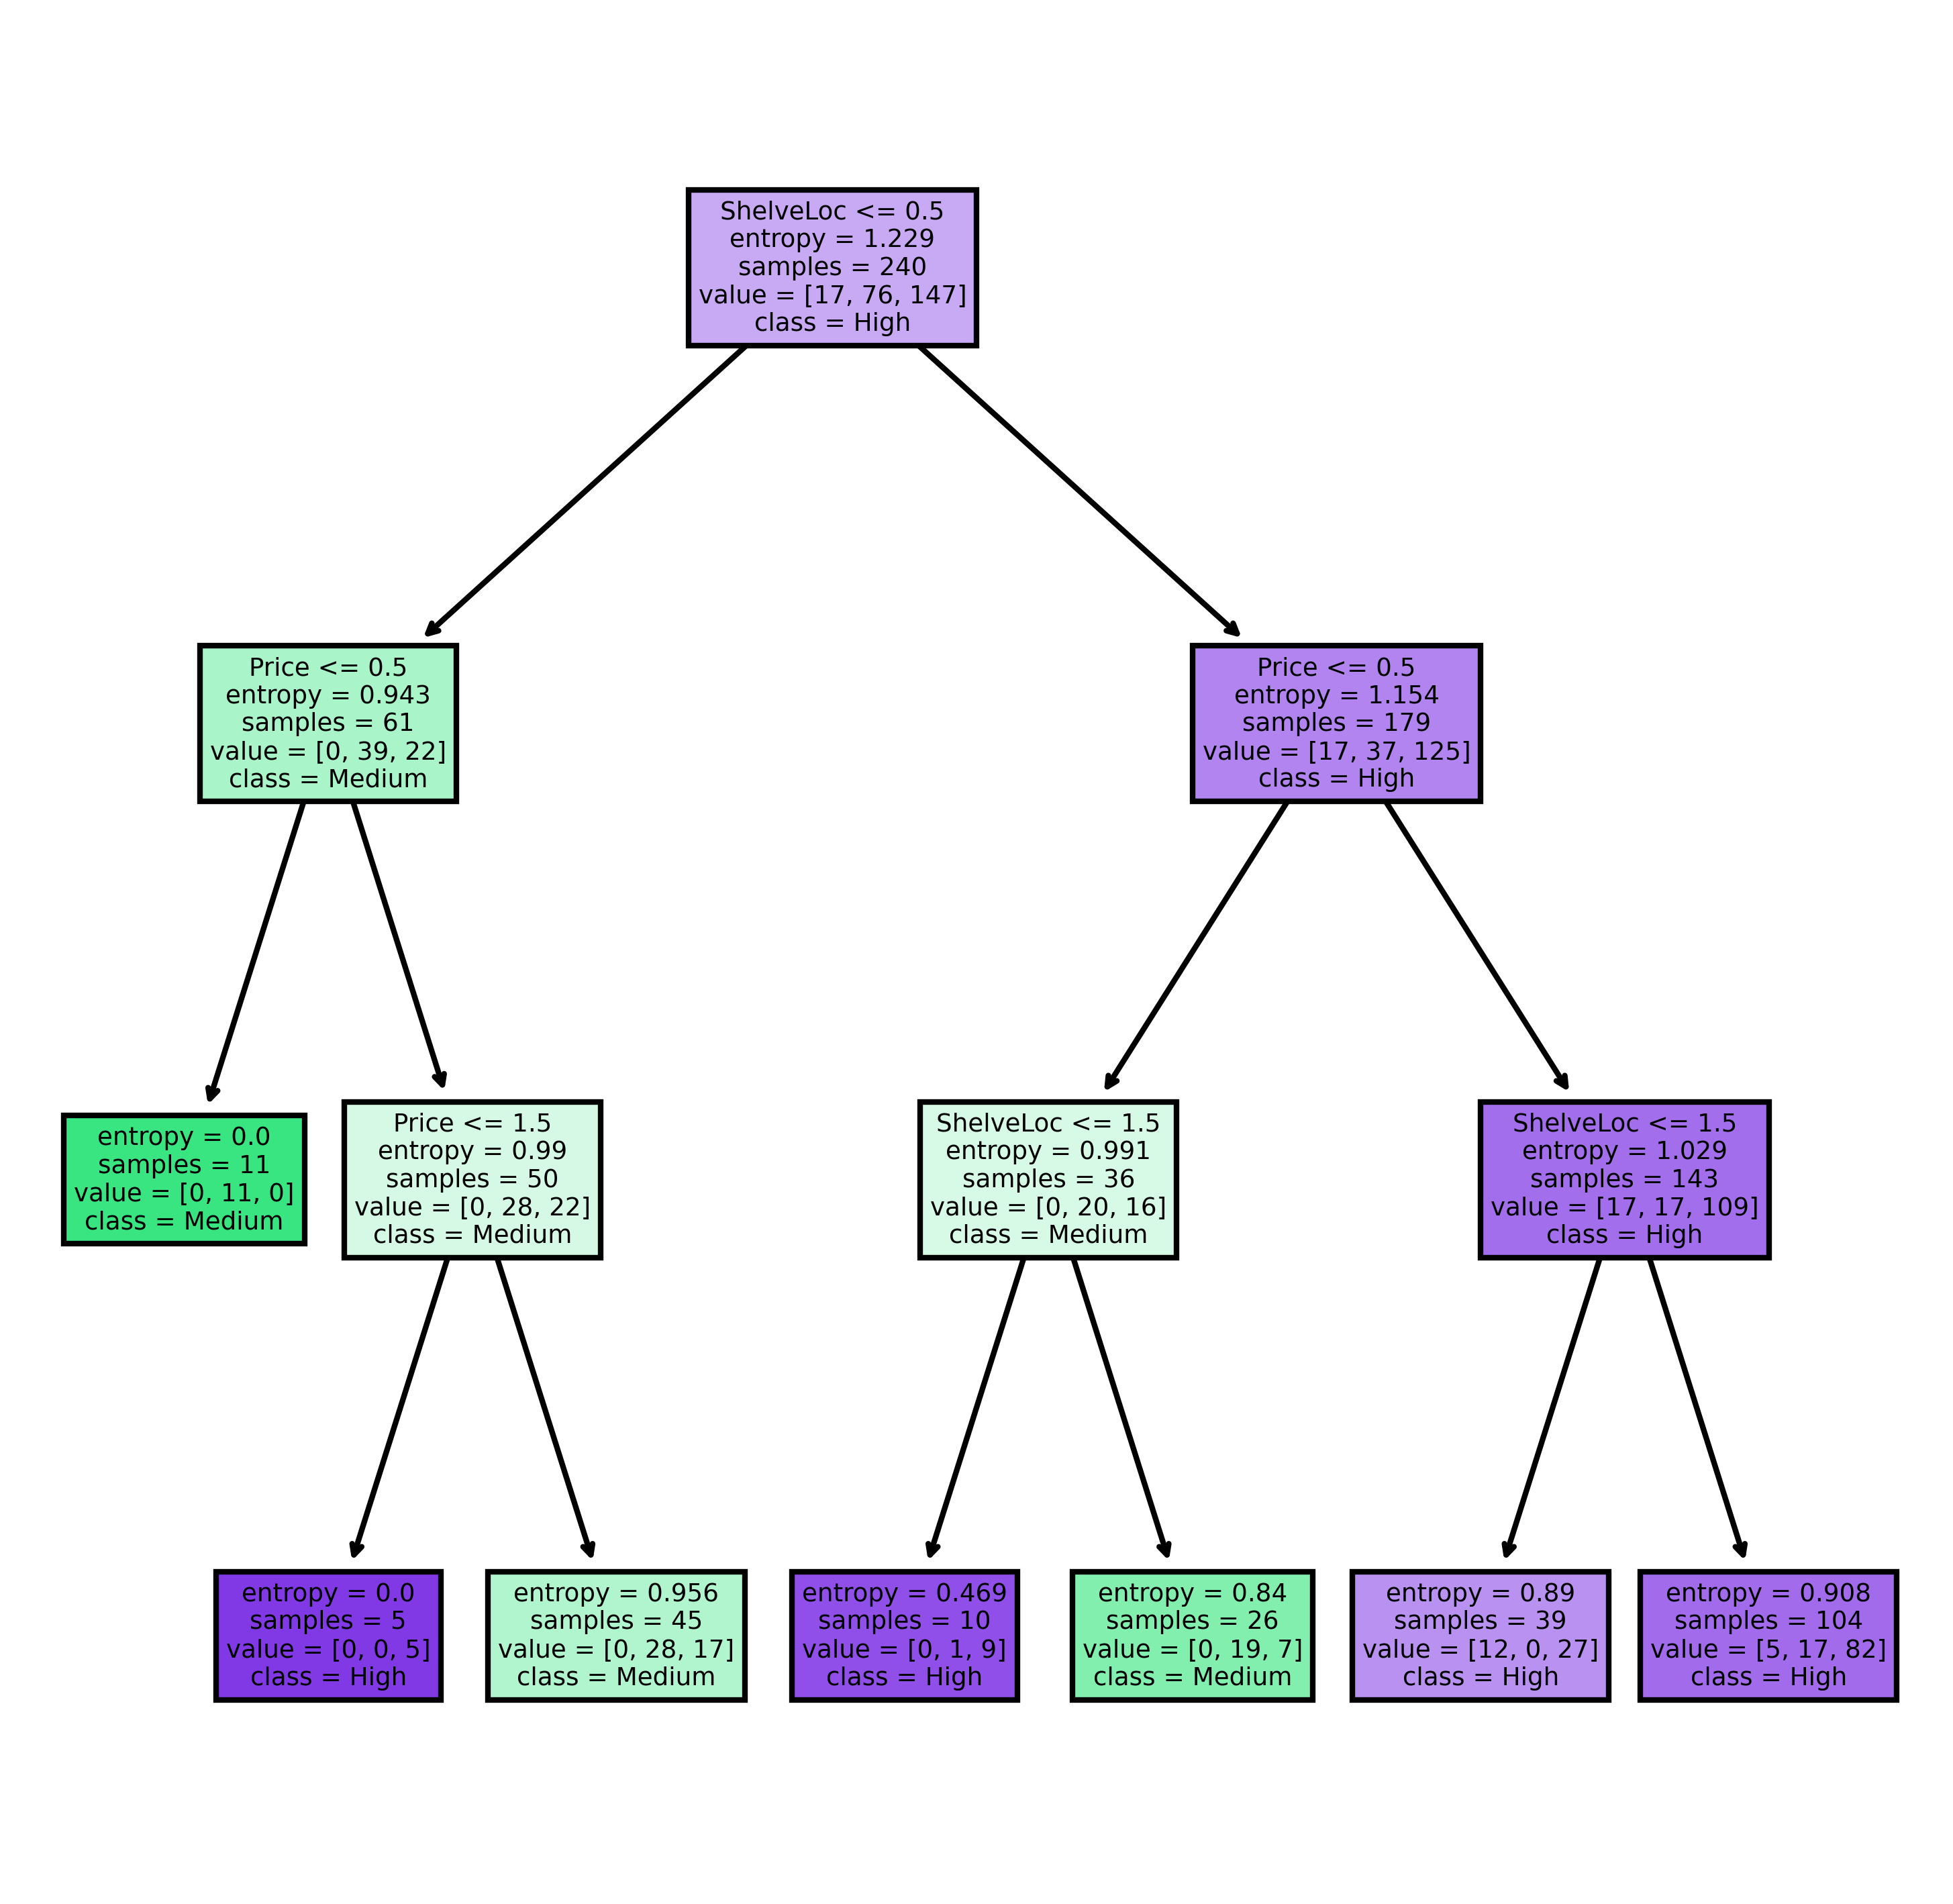

In [206]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(dt,feature_names = fn,class_names=cn,filled = True);

# fig = plt.figure(figsize=(25,20))
# tree.plot_tree(dt,
#                    feature_names=X.columns,
#                    class_names=['True', 'False'],
#                    filled=True)

In [207]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [208]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [209]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7541666666666667


array([[  0,   0,  17],
       [  0,  58,  18],
       [  0,  24, 123]], dtype=int64)

In [210]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.65


array([[ 0,  0, 10],
       [ 0, 27, 27],
       [ 0, 19, 77]], dtype=int64)

In [211]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True)

In [212]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Without setting any hyper-parameters

In [213]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

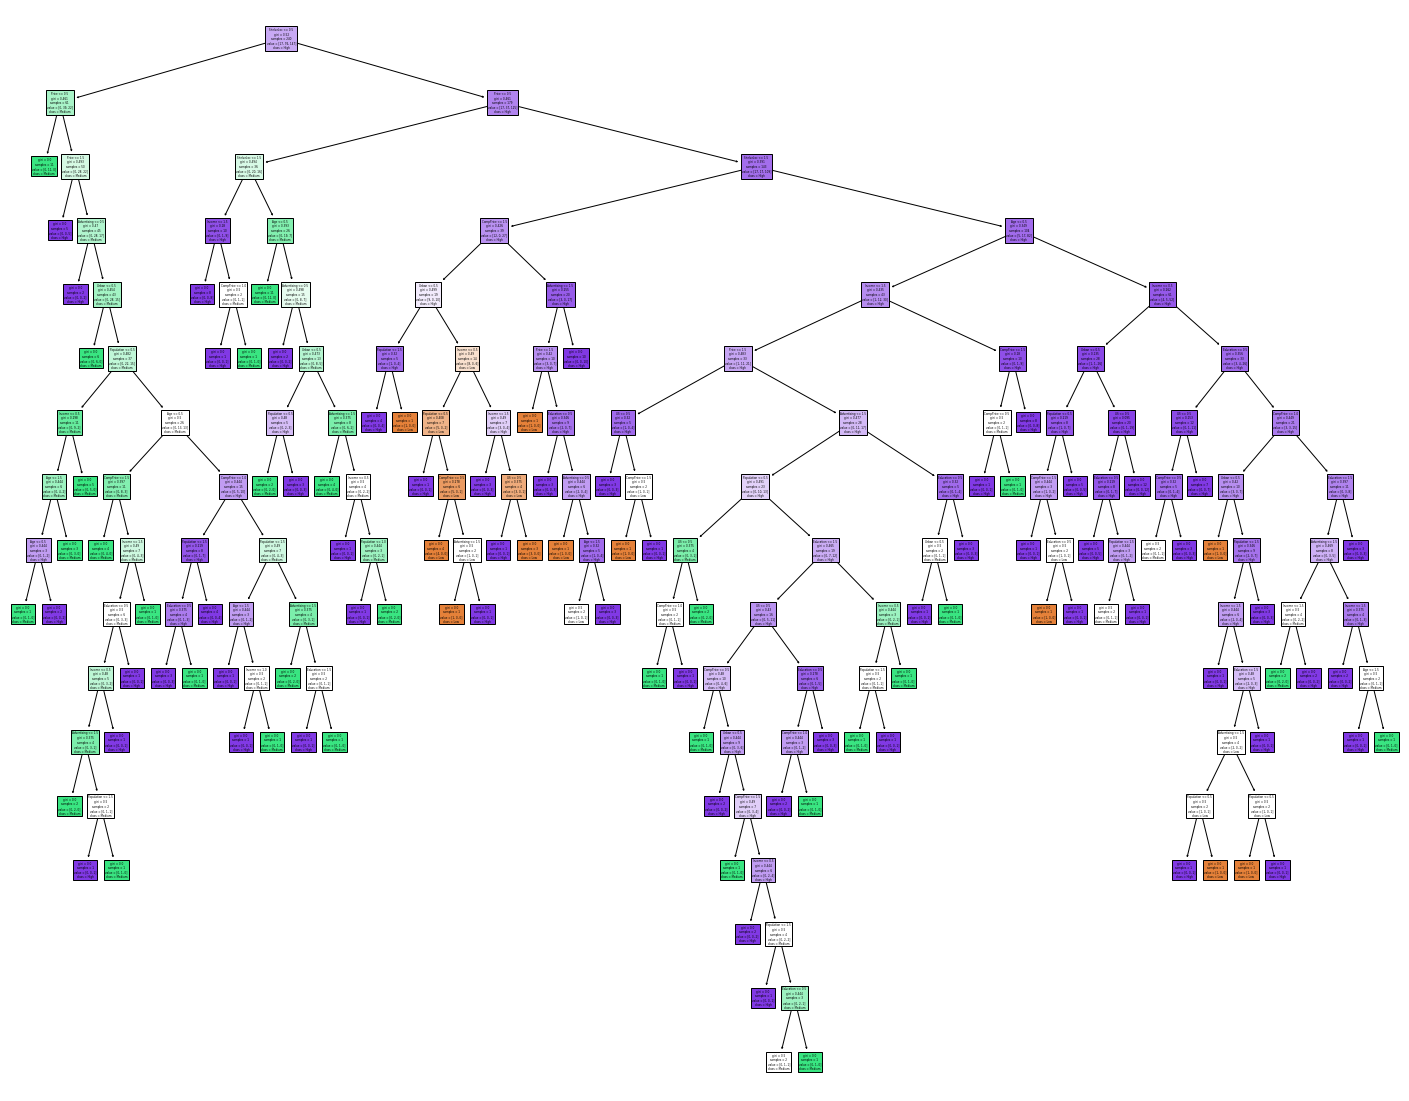

In [214]:
gph = get_dt_graph(dt_default)

In [215]:
evaluate_model(dt_default)

Train Accuracy : 0.9833333333333333
Train Confusion Matrix:
[[ 17   0   0]
 [  0  76   0]
 [  1   3 143]]
--------------------------------------------------
Test Accuracy : 0.65625
Test Confusion Matrix:
[[ 5  0  5]
 [ 0 32 22]
 [10 18 68]]


Controlling the depth of the tree

In [216]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

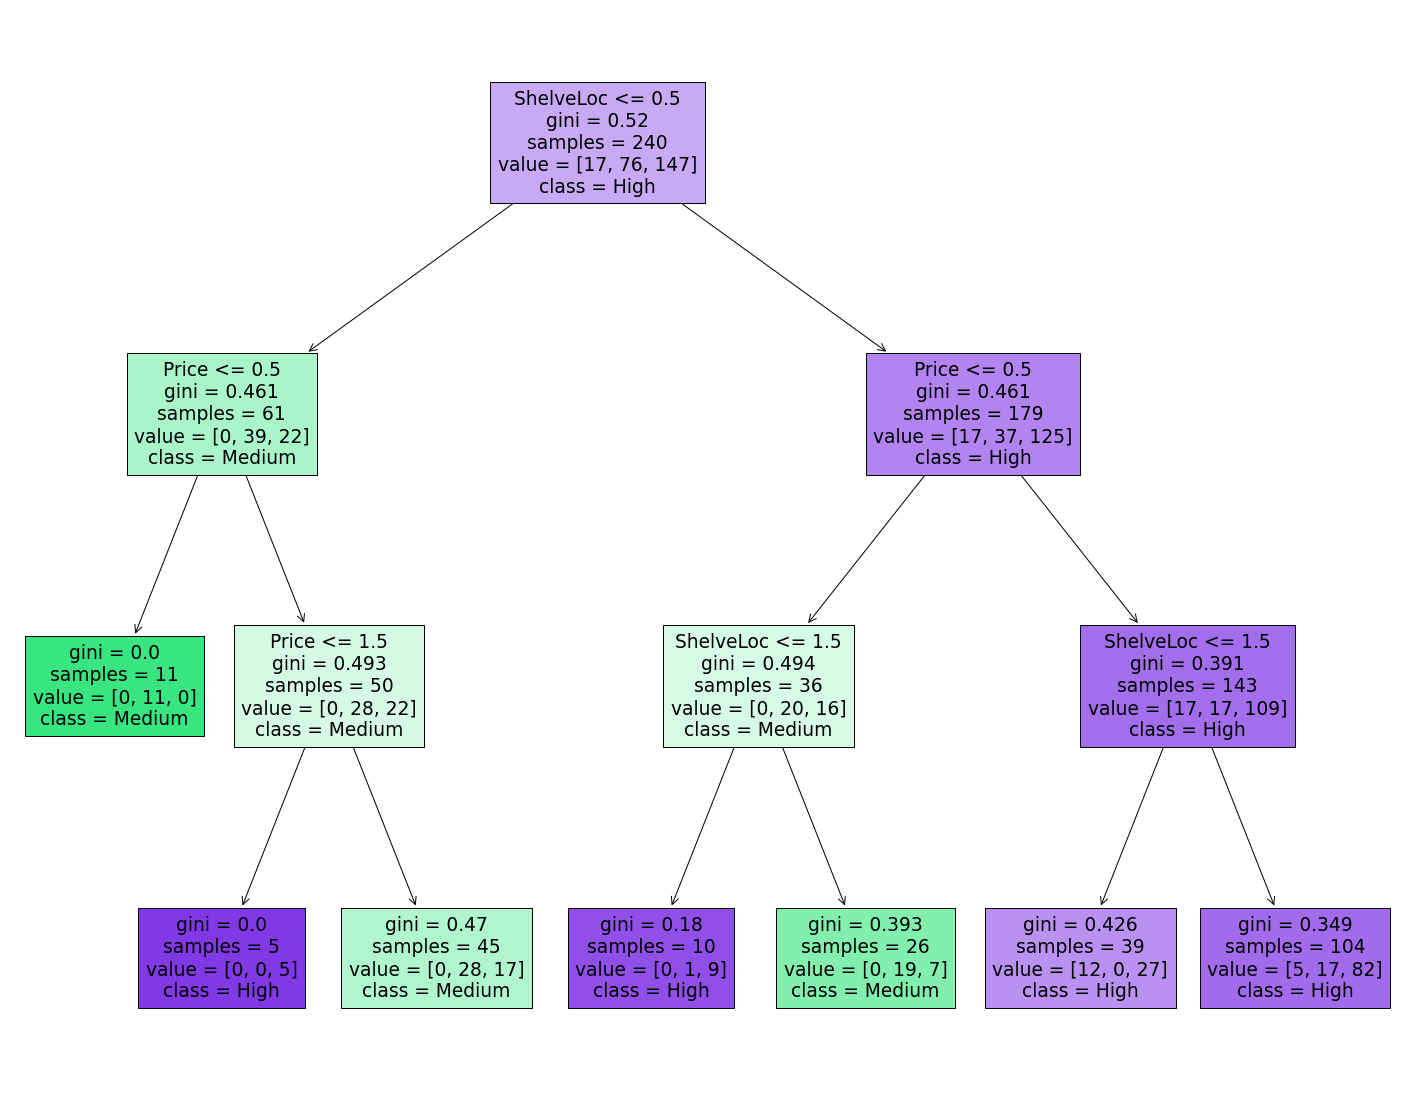

In [217]:
gph = get_dt_graph(dt_depth) 

In [218]:
evaluate_model(dt_depth)

Train Accuracy : 0.7541666666666667
Train Confusion Matrix:
[[  0   0  17]
 [  0  58  18]
 [  0  24 123]]
--------------------------------------------------
Test Accuracy : 0.65
Test Confusion Matrix:
[[ 0  0 10]
 [ 0 27 27]
 [ 0 19 77]]


In [220]:
print(classification_report(y_test, dt_depth.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.59      0.50      0.54        54
           2       0.68      0.80      0.73        96

    accuracy                           0.65       160
   macro avg       0.42      0.43      0.42       160
weighted avg       0.60      0.65      0.62       160



Specifying minimum samples before split

In [221]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

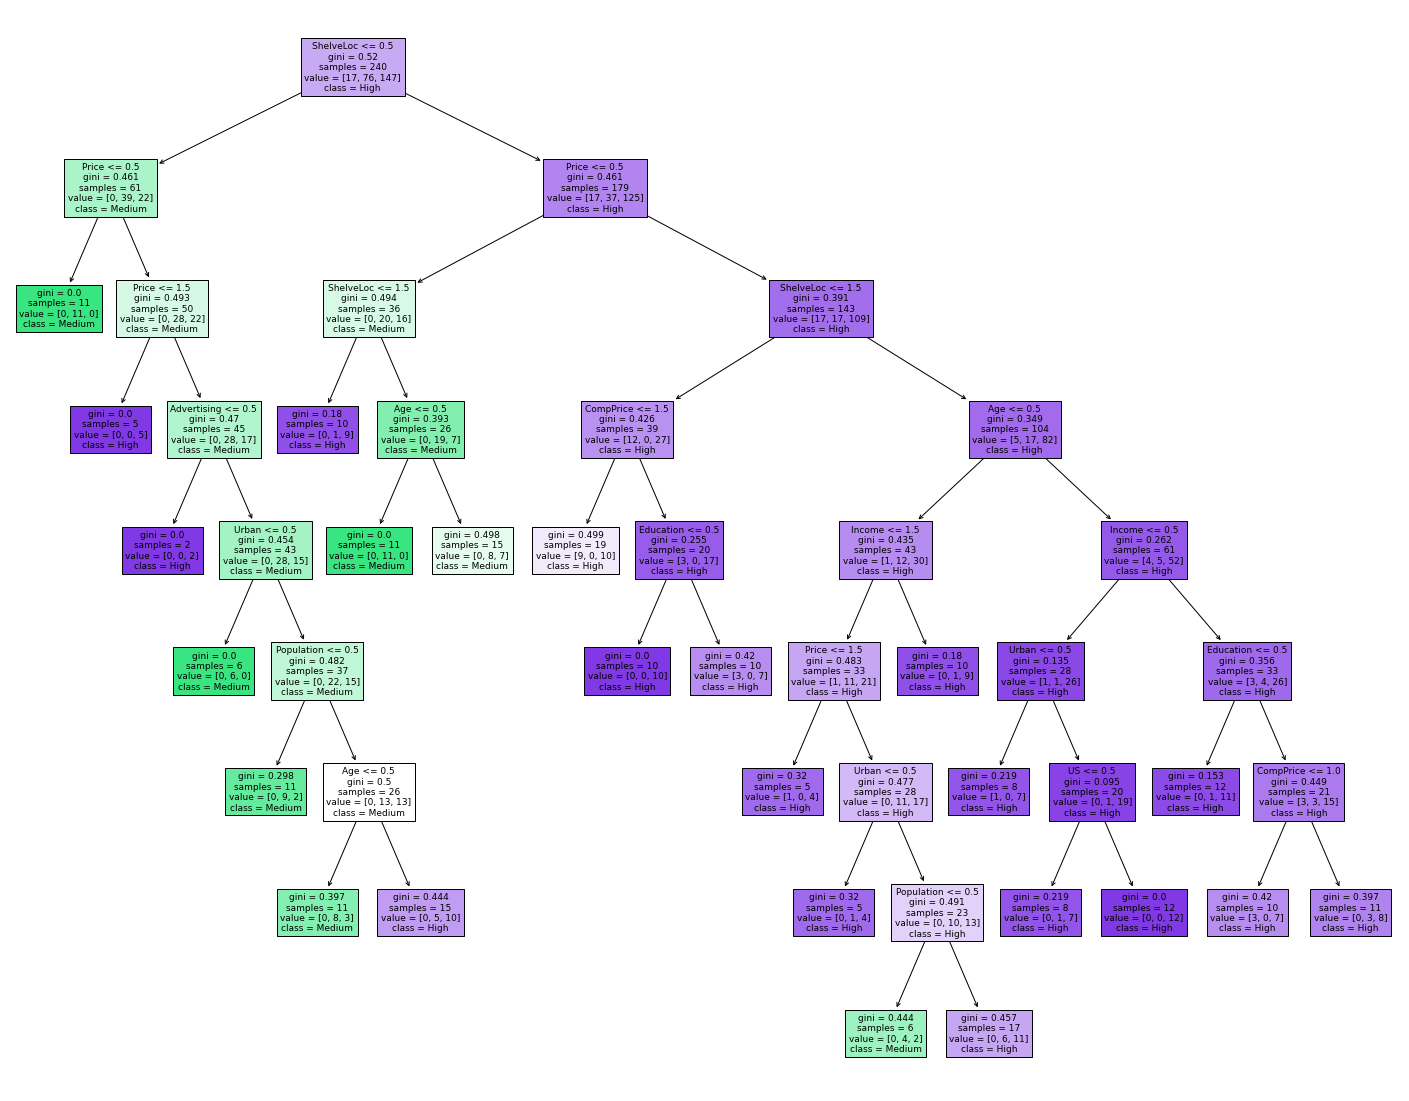

In [222]:
gph = get_dt_graph(dt_min_split) 

In [223]:
evaluate_model(dt_min_split)

Train Accuracy : 0.7916666666666666
Train Confusion Matrix:
[[  0   0  17]
 [  0  57  19]
 [  0  14 133]]
--------------------------------------------------
Test Accuracy : 0.6625
Test Confusion Matrix:
[[ 0  0 10]
 [ 0 29 25]
 [ 0 19 77]]


In [224]:
print(classification_report(y_test, dt_min_split.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.60      0.54      0.57        54
           2       0.69      0.80      0.74        96

    accuracy                           0.66       160
   macro avg       0.43      0.45      0.44       160
weighted avg       0.62      0.66      0.64       160



Specifying minimum samples in leaf node

In [225]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

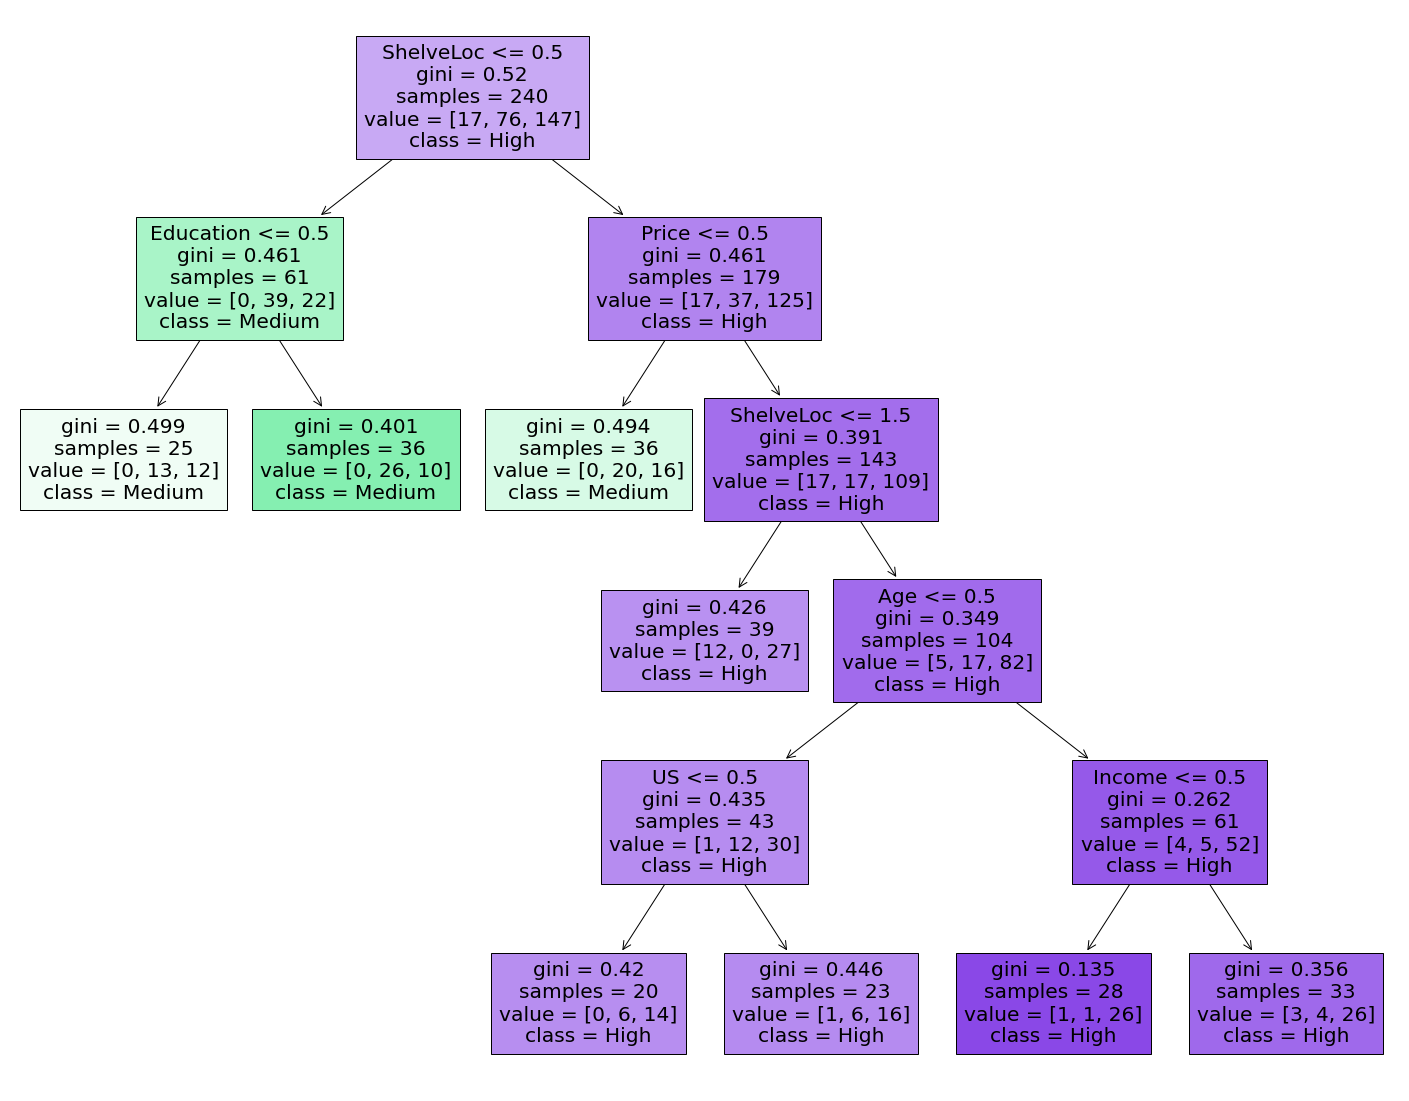

In [226]:
gph = get_dt_graph(dt_min_leaf)

In [227]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7
Train Confusion Matrix:
[[  0   0  17]
 [  0  59  17]
 [  0  38 109]]
--------------------------------------------------
Test Accuracy : 0.6125
Test Confusion Matrix:
[[ 0  0 10]
 [ 0 28 26]
 [ 0 26 70]]


Using Entropy instead of Gini

In [228]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

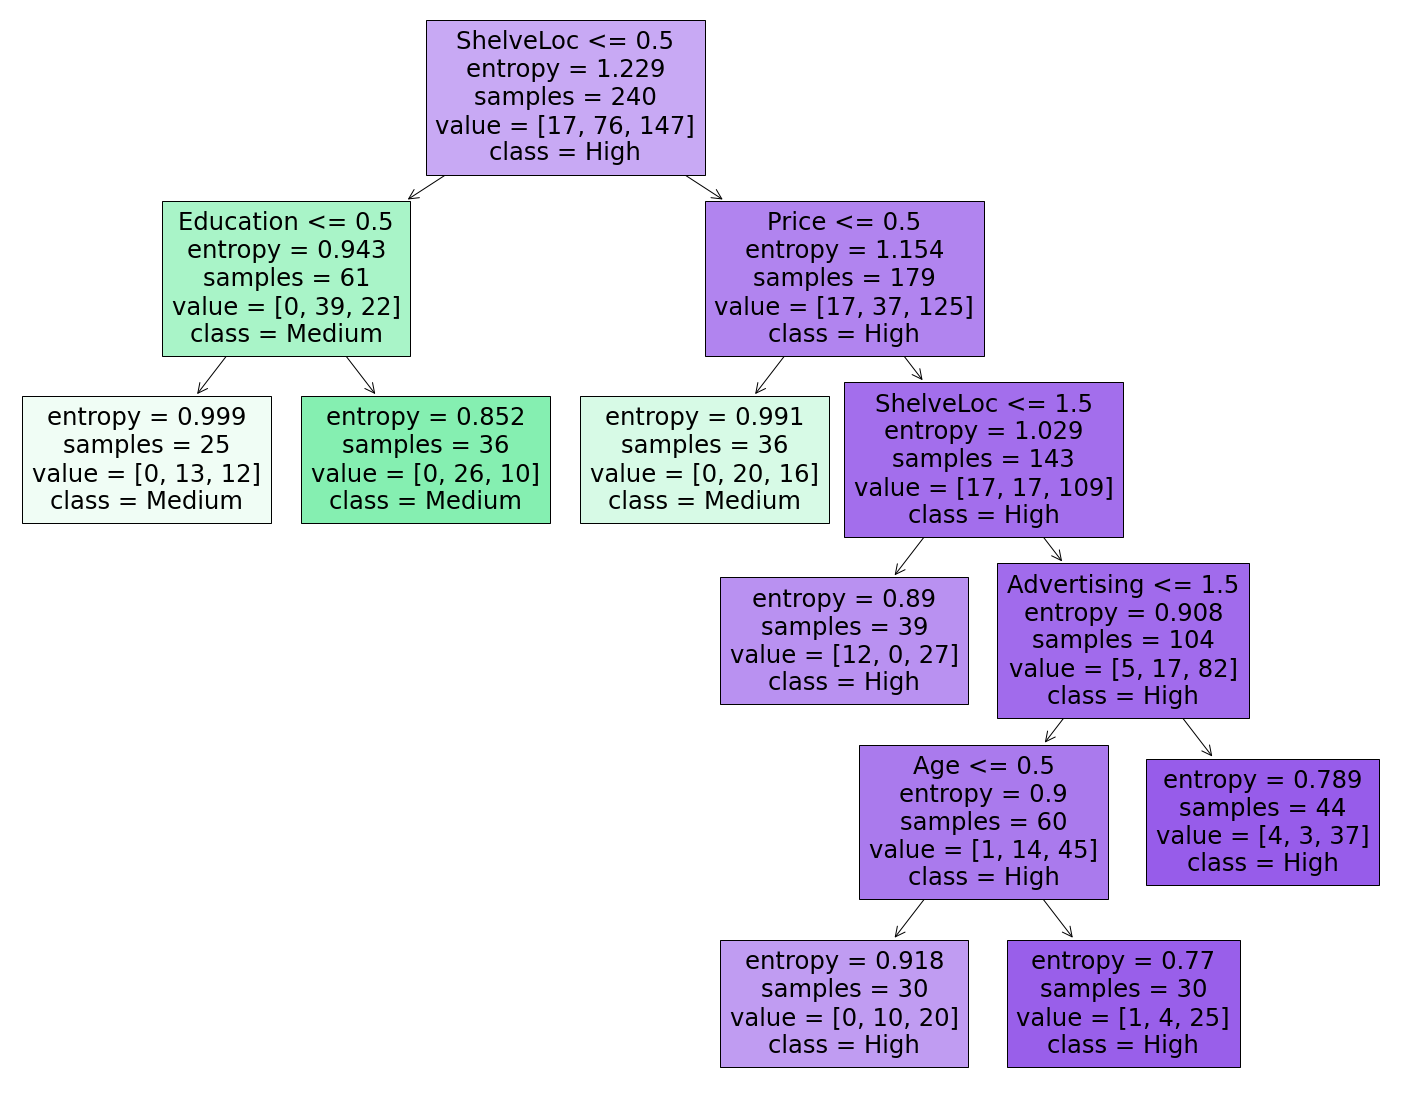

In [229]:
gph = get_dt_graph(dt_min_leaf_entropy)

In [230]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7
Train Confusion Matrix:
[[  0   0  17]
 [  0  59  17]
 [  0  38 109]]
--------------------------------------------------
Test Accuracy : 0.6125
Test Confusion Matrix:
[[ 0  0 10]
 [ 0 28 26]
 [ 0 26 70]]


In [232]:
print(classification_report(y_test, dt_min_leaf_entropy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.52      0.52      0.52        54
           2       0.66      0.73      0.69        96

    accuracy                           0.61       160
   macro avg       0.39      0.42      0.40       160
weighted avg       0.57      0.61      0.59       160



# Hyper-parameter tuning

In [233]:
dt = DecisionTreeClassifier(random_state=42)

In [234]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [235]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [236]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [237]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003487,0.000496,0.001724,0.000465,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.716667,0.616667,0.750000,0.616667,0.675000,0.059512,4
1,0.003077,0.000151,0.002243,0.000431,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.716667,0.616667,0.683333,0.616667,0.658333,0.043301,22
2,0.004737,0.001298,0.002490,0.000495,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.716667,0.616667,0.750000,0.616667,0.675000,0.059512,4
3,0.003991,0.000706,0.001990,0.000004,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.616667,0.616667,0.616667,0.516667,0.591667,0.043301,41
4,0.003490,0.000496,0.002243,0.000433,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.616667,0.616667,0.616667,0.600000,0.612500,0.007217,31


In [238]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
35,0.003489,0.000499,0.001993,7.226679e-07,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.800000,0.733333,0.633333,0.650000,0.704167,0.067056,1
10,0.003737,0.001295,0.001993,5.057622e-07,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.800000,0.733333,0.633333,0.633333,0.700000,0.070711,2
30,0.003740,0.000428,0.001992,3.781021e-06,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.716667,0.716667,0.683333,0.633333,0.687500,0.034106,3
0,0.003487,0.000496,0.001724,4.651257e-04,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.716667,0.616667,0.750000,0.616667,0.675000,0.059512,4
2,0.004737,0.001298,0.002490,4.951463e-04,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.716667,0.616667,0.750000,0.616667,0.675000,0.059512,4


In [239]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [240]:
dt_best = grid_search.best_estimator_

In [241]:
evaluate_model(dt_best)

Train Accuracy : 0.7875
Train Confusion Matrix:
[[  8   0   9]
 [  0  47  29]
 [  6   7 134]]
--------------------------------------------------
Test Accuracy : 0.65
Test Confusion Matrix:
[[ 1  0  9]
 [ 0 19 35]
 [ 1 11 84]]


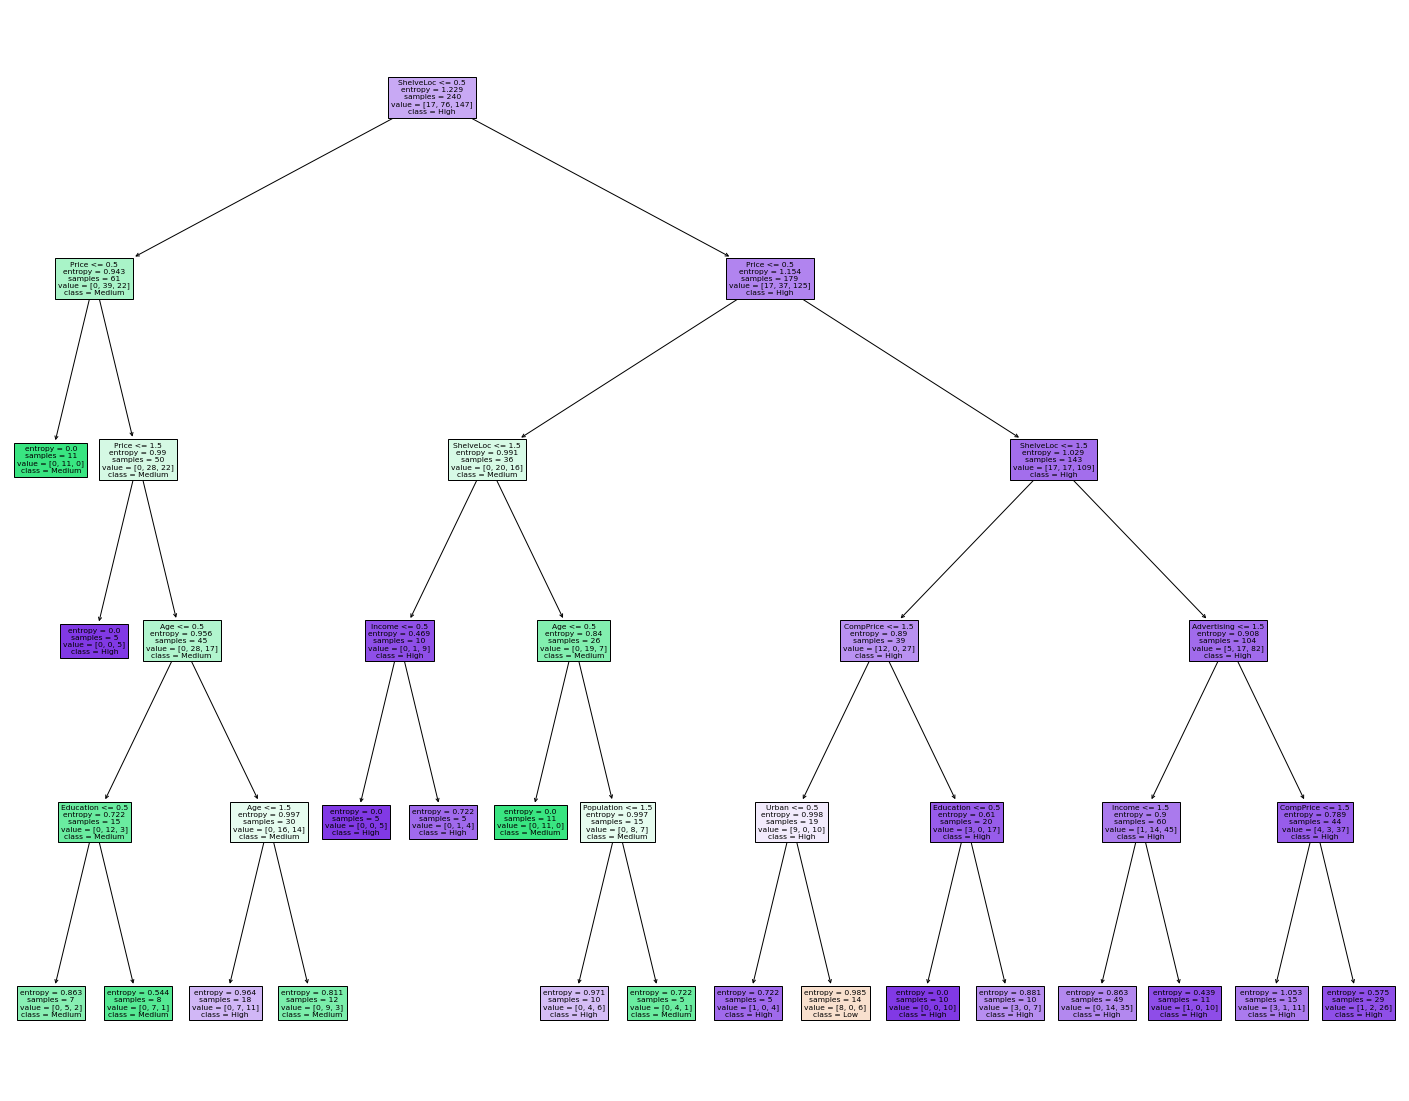

In [243]:
get_dt_graph(dt_best)

In [244]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.63      0.35      0.45        54
           2       0.66      0.88      0.75        96

    accuracy                           0.65       160
   macro avg       0.60      0.44      0.46       160
weighted avg       0.64      0.65      0.61       160



In [249]:
# Checking accuracy of model
dt_min_leaf_entropy.score(X_test, y_test)

0.6125

In [248]:
# Checking accuracy of model
dt_best.score(X_test, y_test)

0.65